# Top videogames publishers

##### Librarys

In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict
import operator
from zipfile import ZipFile

##### Fetching data from kaggle with Python using API

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

##### Downloading zip dataset for videogames sales

In [3]:
api.dataset_download_files('gregorut/videogamesales')

##### Extract and save csv file from zip

In [4]:
zf = ZipFile('videogamesales.zip')
#extracted data is saved in the same directory as notebook
zf.extractall('Datasets') 
zf.close()

##### Save .csv file in dataset path

In [5]:
path="Datasets/vgsales.csv"

##### Read videogames dataset and explore its features with header

In [6]:
f = open(path,'r',encoding = 'utf8')

In [7]:
reader = csv.reader(f, delimiter = ",")

In [8]:
header = next(reader)
print(header)

['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


##### Fill a dataset list reading line by line and setting its datatypes

In [9]:
dataset = []
for line in reader:
    d = dict(zip(header,line))
    for field in ['Rank']:
        d[field] = int(d[field])
    for field in ['Global_Sales']:
        d[field] = float(d[field])
    dataset.append(d)
        
        

##### Verify the content of dataset

In [10]:
len(dataset)

16598

##### Review content of first row of the dataset

In [11]:
dataset[0]

{'Rank': 1,
 'Name': 'Wii Sports',
 'Platform': 'Wii',
 'Year': '2006',
 'Genre': 'Sports',
 'Publisher': 'Nintendo',
 'NA_Sales': '41.49',
 'EU_Sales': '29.02',
 'JP_Sales': '3.77',
 'Other_Sales': '8.46',
 'Global_Sales': 82.74}

##### Create a subset of Dataset taking Publisher and Global Sales and adding to a dictionary to count

In [12]:
bestPub = defaultdict(list)

In [13]:
for d in dataset:
    pub = d['Publisher']
    bestPub[pub].append(d['Global_Sales'])
    
    

##### Create a SumSales dict to sum the Global Sales for every game of every Publisher

In [14]:
sumSales = {}

In [15]:
for d in bestPub:
    sumSales[d] = sum(bestPub[d])

##### Select all the best videogames seller greater than 400 millions of games sold.

In [16]:
topSales = dict()
for (key,value) in sumSales.items():
    if value > 400:
        topSales[key]=value

##### Sorting by descendant way

In [17]:
topSales
sortTopSales = dict(sorted(topSales.items(), key=operator.itemgetter(1),reverse=True))
sortTopSales

{'Nintendo': 1786.5599999999981,
 'Electronic Arts': 1110.3199999999915,
 'Activision': 727.4599999999983,
 'Sony Computer Entertainment': 607.4999999999989,
 'Ubisoft': 474.71999999999935}

##### Assign an X Value with the result of top sales sorted

In [18]:
X = list(sortTopSales.keys())

In [19]:
X

['Nintendo',
 'Electronic Arts',
 'Activision',
 'Sony Computer Entertainment',
 'Ubisoft']

##### Assign a Y Value to write results in a bar plot.

In [20]:
Y = [sortTopSales[x] for x in X]

In [21]:
Y

[1786.5599999999981,
 1110.3199999999915,
 727.4599999999983,
 607.4999999999989,
 474.71999999999935]

##### Adding details to bar plot

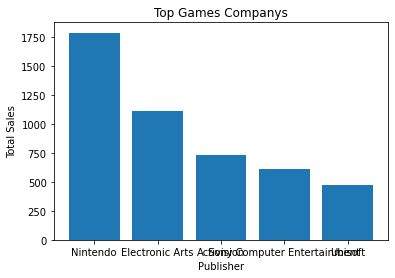

In [22]:
plt.xlabel("Publisher")
plt.ylabel("Total Sales")
plt.title("Top Games Companys")
plt.bar(X,Y)
plt.show()

##### A best way for view the plot is inverting the axis

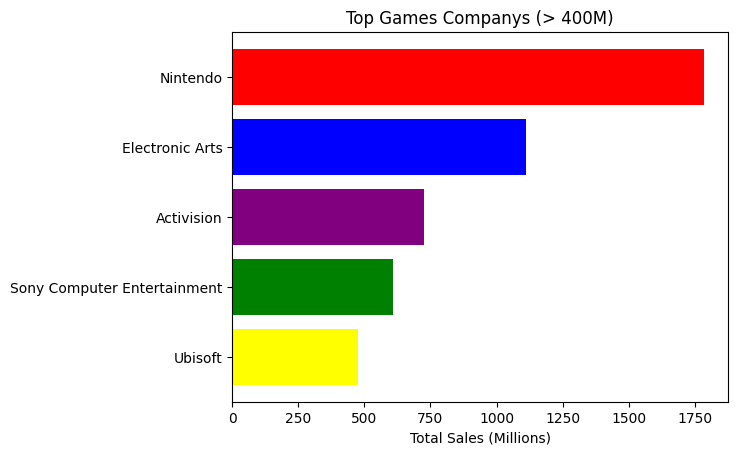

In [23]:
np.random.seed(19680801)
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(X, Y, align='center',color=['red', 'blue', 'purple', 'green','yellow'])
ax.set_yticks(X)
ax.set_yticklabels(X)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Total Sales (Millions)")
ax.set_title("Top Games Companys (> 400M)")
plt.show()